In [29]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import os

In [30]:
import splitfolders

In [31]:
input_folder = 'data/'

In [32]:
splitfolders.ratio(input_folder,output='main_data',seed=42,ratio=(.8,.1,.1),group_prefix=None)

Copying files: 2999 files [00:03, 788.37 files/s]


In [33]:
IMAGE_SIZE=256
BATCH_SIZE=32
channels=3
EPOCHS=50

In [34]:
from keras import models
from keras import layers

In [35]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, channels)
n_classes = 22

model = models.Sequential([
    
    layers.Conv2D(16, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu' ),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
     layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [36]:
PATH=r'C:\Users\hp\OneDrive\Desktop\Leaf_classification\main_data'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'val')
test_dir=os.path.join(PATH,'test')

In [37]:

import seaborn as sns

Text(0.5, 1.0, 'Number of training images per category:')

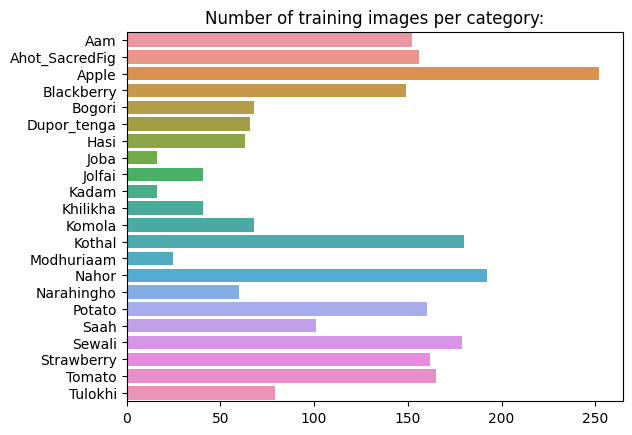

In [38]:
train_data_dir = train_dir
val_data_dir = validation_dir

category_names = sorted(os.listdir(train_dir))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = train_dir + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

In [39]:
batch_size = 32
# only rescaling
train_datagen =  tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
test_datagen =  tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size = (256, 256),
batch_size = 32, 
class_mode = "categorical")

print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
validation_dir,
target_size = (256, 256),
batch_size = 32,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size = (256, 256),
batch_size = 32,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 2391 images belonging to 22 classes.
Total number of images for "validation":
Found 291 images belonging to 22 classes.
Total number of images for "testing":
Found 317 images belonging to 22 classes.


In [40]:
from keras import models
from keras import layers
from keras import optimizers

In [41]:
learning_rate = 5e-5
epochs = 50

model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate, clipnorm = 1.), metrics = ['acc'])

In [42]:
history = model.fit(train_generator, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=val_generator,
                              
                              )

Epoch 1/50
75/75 [==============================] - 49s 633ms/step - loss: 2.8106 - acc: 0.0862 - val_loss: 2.5904 - val_acc: 0.1409
Epoch 2/50
75/75 [==============================] - 45s 597ms/step - loss: 2.5465 - acc: 0.1317 - val_loss: 2.4696 - val_acc: 0.1959
Epoch 3/50
75/75 [==============================] - 32s 428ms/step - loss: 2.4145 - acc: 0.2535 - val_loss: 2.3142 - val_acc: 0.3196
Epoch 4/50
75/75 [==============================] - 35s 464ms/step - loss: 2.2629 - acc: 0.3128 - val_loss: 2.1300 - val_acc: 0.3780
Epoch 5/50
75/75 [==============================] - 36s 474ms/step - loss: 2.1010 - acc: 0.3743 - val_loss: 1.9668 - val_acc: 0.4261
Epoch 6/50
75/75 [==============================] - 36s 482ms/step - loss: 1.9360 - acc: 0.4404 - val_loss: 1.8124 - val_acc: 0.5120
Epoch 7/50
75/75 [==============================] - 37s 493ms/step - loss: 1.7933 - acc: 0.5123 - val_loss: 1.6717 - val_acc: 0.5464
Epoch 8/50
75/75 [==============================] - 38s 502ms/step - 

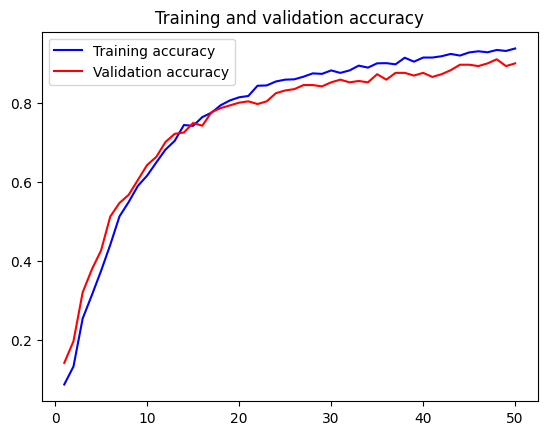

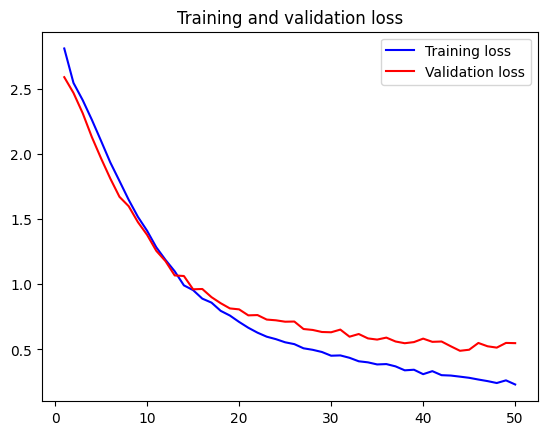

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('Accuracy.jpg')
plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Loss.jpg')

In [44]:
import numpy as np
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes, figname,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):

    import numpy as np
    import matplotlib.pyplot as plt
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
         print("Confusion matrix, without normalization")


    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True Label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.savefig(figname)

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
train_ds =  keras.utils.image_dataset_from_directory(
     train_dir,
    labels='inferred',
    batch_size=32,
    image_size=(256,256)
)

validation_ds =  keras.utils.image_dataset_from_directory(
    
    validation_dir,
    labels='inferred',
    batch_size=32,
    image_size=(256,256)
)

test_ds =  keras.utils.image_dataset_from_directory(
    
    test_dir,
    labels='inferred',
    batch_size=32,
    image_size=(256,256)
)

Found 2391 files belonging to 22 classes.
Found 291 files belonging to 22 classes.
Found 317 files belonging to 22 classes.


In [47]:
class_names=train_ds.class_names
class_names

['Aam',
 'Ahot_SacredFig',
 'Apple',
 'Blackberry',
 'Bogori',
 'Dupor_tenga',
 'Hasi',
 'Joba',
 'Jolfai',
 'Kadam',
 'Khilikha',
 'Komola',
 'Kothal',
 'Modhuriaam',
 'Nahor',
 'Narahingho',
 'Potato',
 'Saah',
 'Sewali',
 'Strawberry',
 'Tomato',
 'Tulokhi']

10/10 [==============================] - 2s 214ms/step
Confusion matrix, without normalization


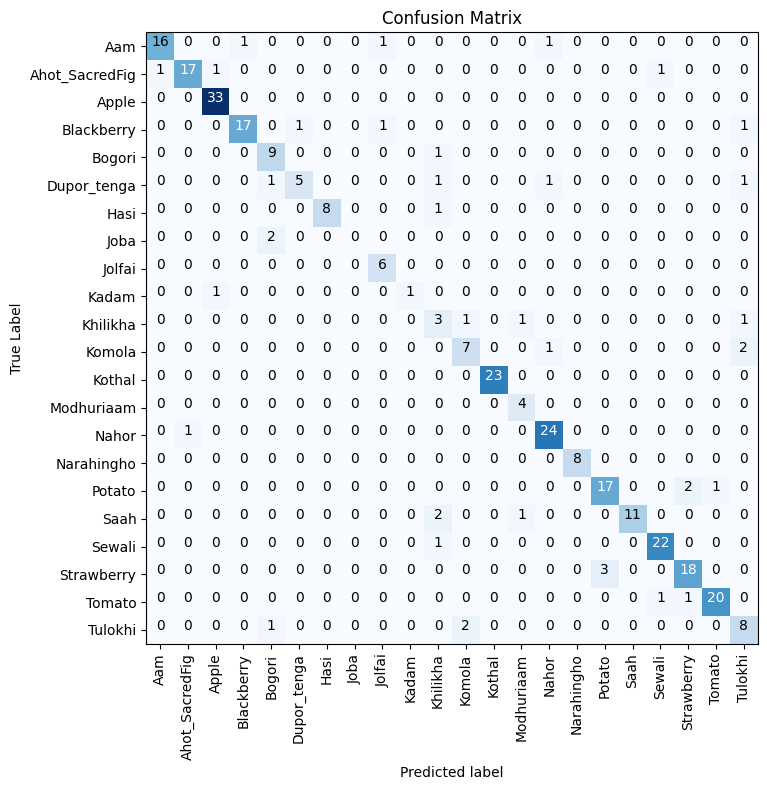

In [48]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, classes = class_names, title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_concrete.jpg')

In [49]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming your model predictions are stored in 'y_pred' and ground truth labels are in 'y_true'

# Convert the predicted probabilities to binary labels
y_pred_labels = np.round(y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(test_generator.classes, y_pred,
                                           average='weighted')
recall = recall_score(test_generator.classes, y_pred,
                                           average='weighted')
f1 = f1_score(test_generator.classes, y_pred,
                                           average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Precision: 0.88
Recall: 0.87
F1 Score: 0.87


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(test_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       0.94      0.85      0.89        20
           2       0.94      1.00      0.97        33
           3       0.94      0.85      0.89        20
           4       0.69      0.90      0.78        10
           5       0.83      0.56      0.67         9
           6       1.00      0.89      0.94         9
           7       0.00      0.00      0.00         2
           8       0.75      1.00      0.86         6
           9       1.00      0.50      0.67         2
          10       0.33      0.50      0.40         6
          11       0.70      0.70      0.70        10
          12       1.00      1.00      1.00        23
          13       0.67      1.00      0.80         4
          14       0.89      0.96      0.92        25
          15       1.00      1.00      1.00         8
          16       0.85      0.85      0.85        20
          17       1.00    

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
